<a href="https://colab.research.google.com/github/Sudharani4/Assignment8.ipynb/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [5]:
from google.colab import files
uploaded = files.upload()





Saving car_data.csv to car_data.csv


In [7]:
df = pd.read_csv("car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [8]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [9]:
df.shape

(804, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
#sb.pairplot(df,hue = 'Make')
#plt.show()

In [11]:
print(df.corr())

             Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000  


In [ ]:
plot = sb.heatmap(df.corr(),cmap='BuPu',annot = True)
plt.show()

In [13]:
x = df['Mileage'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state = 7)

In [15]:
from sklearn.linear_model import LinearRegression

li_reg = LinearRegression()

li_reg = li_reg.fit(x,y)

intercept = li_reg.intercept_
coefficient = li_reg.coef_

In [ ]:
print('intercept:', li_reg.intercept_)
print('coefficient:', li_reg.coef_)

In [16]:
f"The regression eqauation for Mileage and price of the car  is y = {coefficient}x + {intercept} "

'The regression eqauation for Mileage and price of the car  is y = [[-0.1725205]]x + [24764.55900606] '

In [17]:
print('r-squared: ', li_reg.score(x, y))

r-squared:  0.02046344732348926


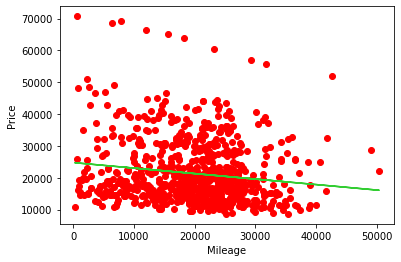

In [18]:
plt.scatter(x, y, c='red')
plt.plot(x, li_reg.predict(x), c='limegreen')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [19]:
df['Mileage'].corr(df['Price'])

-0.1430505061979486

it's observed that mileage and price are negatively correlated which is not a good feature selection and to make predictions

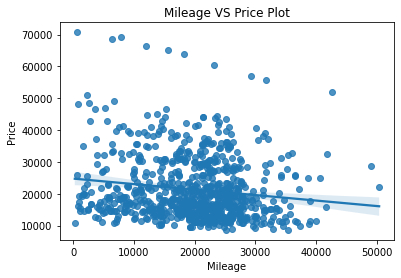

In [20]:
import seaborn as sb
data = df
plt.figure()
sb.regplot(x = 'Mileage',y = 'Price', data = df).set(title = f'Mileage VS Price Plot')
plt.show()

In [21]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [23]:
x = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
y = df[['Price']]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=7)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
  
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x_ = scaler.fit_transform(x)
x = pd.DataFrame(x_, columns=x.columns)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature selection [ True  True  True  True  True  True  True]
Feature scores [ 17.34867194 263.11330983 252.02364121  15.24723659 120.07312671
  10.1147833   15.56398265]
Selected features: ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
Removed features: []


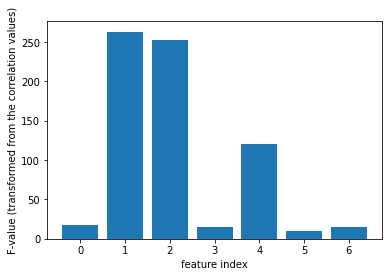

In [26]:
# feature selection

fes = SelectKBest(score_func=f_regression, k='all')
fes.fit(x_train,y_train)
x_train = fes.transform(x_train)
x_test = fes.transform(x_test)


print("Feature selection", fes.get_support())
print("Feature scores", fes.scores_)
print("Selected features:", list(x.columns[fes.get_support()]))
print("Removed features:", list(x.columns[~fes.get_support()]))

plt.bar([i for i in range(len(fes.scores_))], fes.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [27]:
li_reg = LinearRegression()

li_reg = li_reg.fit(x_train,y_train)

intercept = li_reg.intercept_
coefficient = li_reg.coef_

In [28]:
print('intercept:', li_reg.intercept_)
print('coefficient:', li_reg.coef_)

intercept: [8669.08382943]
coefficient: [[-2.20965030e-01  3.60373178e+03 -4.46688647e+02 -1.81630216e+03
   6.46938454e+03 -2.30648236e+03  3.74609177e+03]]


In [29]:
print('r-squared: ', li_reg.score(x_train, y_train))

r-squared:  0.45599559397292133


In [30]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [31]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [32]:
df_copy = df.copy()

In [33]:
df_copy.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [34]:
df_copy = pd.get_dummies(df_copy,columns=['Make','Model','Trim','Type'])

In [35]:
df_copy.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [36]:
df = df_copy

In [37]:
df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197,-0.017768,0.659297,...,-0.126745,-0.134573,0.038838,0.040549,-0.060414,0.508018,-0.168087,-0.206178,-0.034802,0.045134
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005,0.024193,-0.037472,...,-0.062219,0.035201,-0.022737,-0.015758,-0.073391,0.027436,0.001510,-0.025691,-0.015905,0.027016
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,0.175317,0.534896,...,-0.102674,-0.102674,0.141306,0.059189,-0.102674,0.061533,-0.041657,-0.055019,0.180832,-0.269058
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,0.188093,0.406216,...,-0.145992,-0.145992,0.120356,0.077468,-0.125677,0.065886,0.046832,-0.125252,0.140098,-0.255308
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,0.184913,0.087104,...,0.062428,0.062428,0.288053,0.062428,0.062428,-0.462921,-0.825444,0.157973,0.694906,0.163594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Type_Convertible,0.508018,0.027436,0.061533,0.065886,-0.462921,0.147689,-0.043637,0.009285,-0.085600,0.086456,...,-0.028899,-0.028899,-0.133346,-0.028899,-0.028899,1.000000,-0.118244,-0.073129,-0.321686,-0.075731
Type_Coupe,-0.168087,0.001510,-0.041657,0.046832,-0.825444,-0.040646,0.097838,0.063507,-0.152636,-0.152636,...,-0.051531,-0.051531,-0.237772,-0.051531,-0.051531,-0.118244,1.000000,-0.130397,-0.573605,-0.135037
Type_Hatchback,-0.206178,-0.025691,-0.055019,-0.125252,0.157973,-0.264846,0.073544,0.090697,-0.094398,-0.094398,...,0.395185,-0.031870,-0.147051,-0.031870,-0.031870,-0.073129,-0.130397,1.000000,-0.354750,-0.083515
Type_Sedan,-0.034802,-0.015905,0.180832,0.140098,0.694906,0.125714,-0.015079,-0.100940,0.266099,0.180930,...,-0.140192,0.089837,0.414521,0.089837,-0.140192,-0.321686,-0.573605,-0.354750,1.000000,-0.367373


In [39]:
x = df.iloc[:,1:98]

In [40]:
x.shape

(804, 97)

In [41]:
y = df.iloc[:,0]

In [42]:
y.shape

(804,)

In [43]:
#x = np.array(x).reshape((-1,97))
#y = np.array(y).reshape((-1,1))

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=7)

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x_ = scaler.fit_transform(x)
x = pd.DataFrame(x_, columns=x.columns)

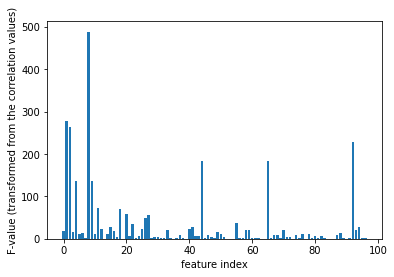

In [47]:
fes = SelectKBest(score_func=f_regression, k='all')
fes.fit(x_train,y_train)
x_train = fes.transform(x_train)
x_test = fes.transform(x_test)

plt.bar([i for i in range(len(fes.scores_))], fes.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [48]:
x_train.shape

(603, 97)

In [49]:
li_reg = LinearRegression()

li_reg = li_reg.fit(x_train,y_train)

intercept = li_reg.intercept_
coefficient = li_reg.coef_

In [50]:
print('intercept:', li_reg.intercept_)
print('coefficient:', li_reg.coef_)

intercept: 16733.183098007554
coefficient: [-1.86362947e-01  5.28448656e+02  4.29032845e+03 -1.35240124e+03
  1.77389717e+01  2.39324646e+02  2.99190071e+02 -3.51391611e+03
  9.79783343e+03 -4.09696379e+03 -4.67650313e+03  5.50229408e+03
 -3.01274448e+03 -3.90032042e+03  1.39046473e+03  2.52480573e+03
  2.31795688e+03  3.16938716e+03 -1.86848097e-01 -2.81039859e+03
  1.27218216e+03 -3.23647884e+02 -5.84645057e+02 -2.24116931e+03
  1.04778034e+03  4.43654605e+02  4.99584361e+03 -5.80518164e+03
  7.34829957e+02  6.91698771e+00 -9.46540962e+02 -3.09454019e+03
 -2.91795558e+03 -7.05219967e+02 -2.30752451e+03 -1.01975837e+03
 -2.21252779e+03 -3.27957040e+03 -3.80188446e+03  1.95953935e+03
  3.70149510e+03  3.74207600e+03  5.34192035e+02  8.99037635e+02
  7.21090969e+03  9.07796853e+02 -1.31726429e+03 -4.03970460e+02
 -9.35844033e+02  2.17591899e+03  2.90800604e+03  1.20490891e+03
 -1.36047846e+03 -9.03359037e+01  4.31055996e+02 -4.43100018e+03
 -1.84354636e+03 -2.52028222e+03  2.53739358e+0

In [51]:
print('r-squared for test set: ', li_reg.score(x_test, y_test))
print('r-squared for train set: ', li_reg.score(x_train, y_train))

r-squared for test set:  0.9880557681020227
r-squared for train set:  0.9932971246974587


In [52]:
#from sklearn.feature_selection import SelectFromModel

#fs_selector = SelectFromModel(estimator = LinearRegression())
#fs_selector.fit(x,y)